# Visualisations and familiarizations

This file contains our data visualisations, cleaning of the data and some
familiarizations to find relationships between columns.

In [28]:
import numpy as np
from scipy.stats import chi2
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# decision tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [29]:
from data_reader import get_data_dict
data = get_data_dict('./data/alzheimers_disease_data.csv')

## Internal and external factors

The dataset contains all sorts of different metrics for a patient. These metrics can be divided into three categories:
- Metadata: `PatientID`, `Diagnosis` and `DoctorInCharge` (since this one is just the same value everywhere)
- Internal factors: `Age`, `Gender`, `Ethnicity`, `BMI`, `FamilyHistoryAlzheimers`, `CardiovascularDisease`, `Diabetes`, `Depression`, `Hypertension`, `SystolicBP`, `DiastolicBP`, `CholesterolTotal`, `CholesterolLDL`, `CholesterolHDL`, `CholesterolTriglycerides`, `MMSE`, `FunctionalAssessment`, `MemoryComplaints`, `BehavioralProblems`, `ADL`, `Confusion`, `Disorientation`, `PersonalityChanges`, `DifficultyCompletingTasks` and `Forgetfulness`
- External factors: `EducationLevel`, `Smoking`, `AlcoholConsumption`, `PhysicalActivity`, `DietQuality` and `SleepQuality`

The metadata is not important for the tests and experiments on the data, as this says nothing about the condition of the patient. The only column here that is important is `Diagnosis`, as it tells us whether or not a patient actually has Alzheimer's disease. This is, for example, the target vector we can use for a regression model.

The internal and external factors can be examined, since these actually tell us something about the health of the patient. These could have an effect on whether or not someone has Alzheimer's disease and therefore they can be used to, for example, make predictions.

In [30]:
# Split the dataset into the three categories described above:
metadata_keys = ["PatientID", "Diagnosis", "DoctorInCharge"]
internal_factors_keys = [
    "Age", "Gender", "Ethnicity", "BMI", "FamilyHistoryAlzheimers",
    "CardiovascularDisease", "Diabetes", "Depression", "Hypertension",
    "SystolicBP", "DiastolicBP", "CholesterolTotal", "CholesterolLDL",
    "CholesterolHDL", "CholesterolTriglycerides", "MMSE", "FunctionalAssessment",
    "MemoryComplaints", "BehavioralProblems", "ADL", "Confusion",
    "Disorientation", "PersonalityChanges", "DifficultyCompletingTasks",
    "Forgetfulness", "HeadInjury"
]
external_factors_keys = ["EducationLevel", "Smoking", "AlcoholConsumption",
                         "PhysicalActivity", "DietQuality", "SleepQuality"]

from data_reader import split_data
metadata, internal_factors, external_factors = split_data()

print("Metadata:", list(metadata.keys()))
print("Internal Factors:", list(internal_factors.keys()))
print("External Factors:", list(external_factors.keys()))

Metadata: ['PatientID', 'Diagnosis', 'DoctorInCharge']
Internal Factors: ['Age', 'Gender', 'Ethnicity', 'BMI', 'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes', 'Depression', 'Hypertension', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment', 'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion', 'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks', 'Forgetfulness', 'HeadInjury']
External Factors: ['EducationLevel', 'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality']


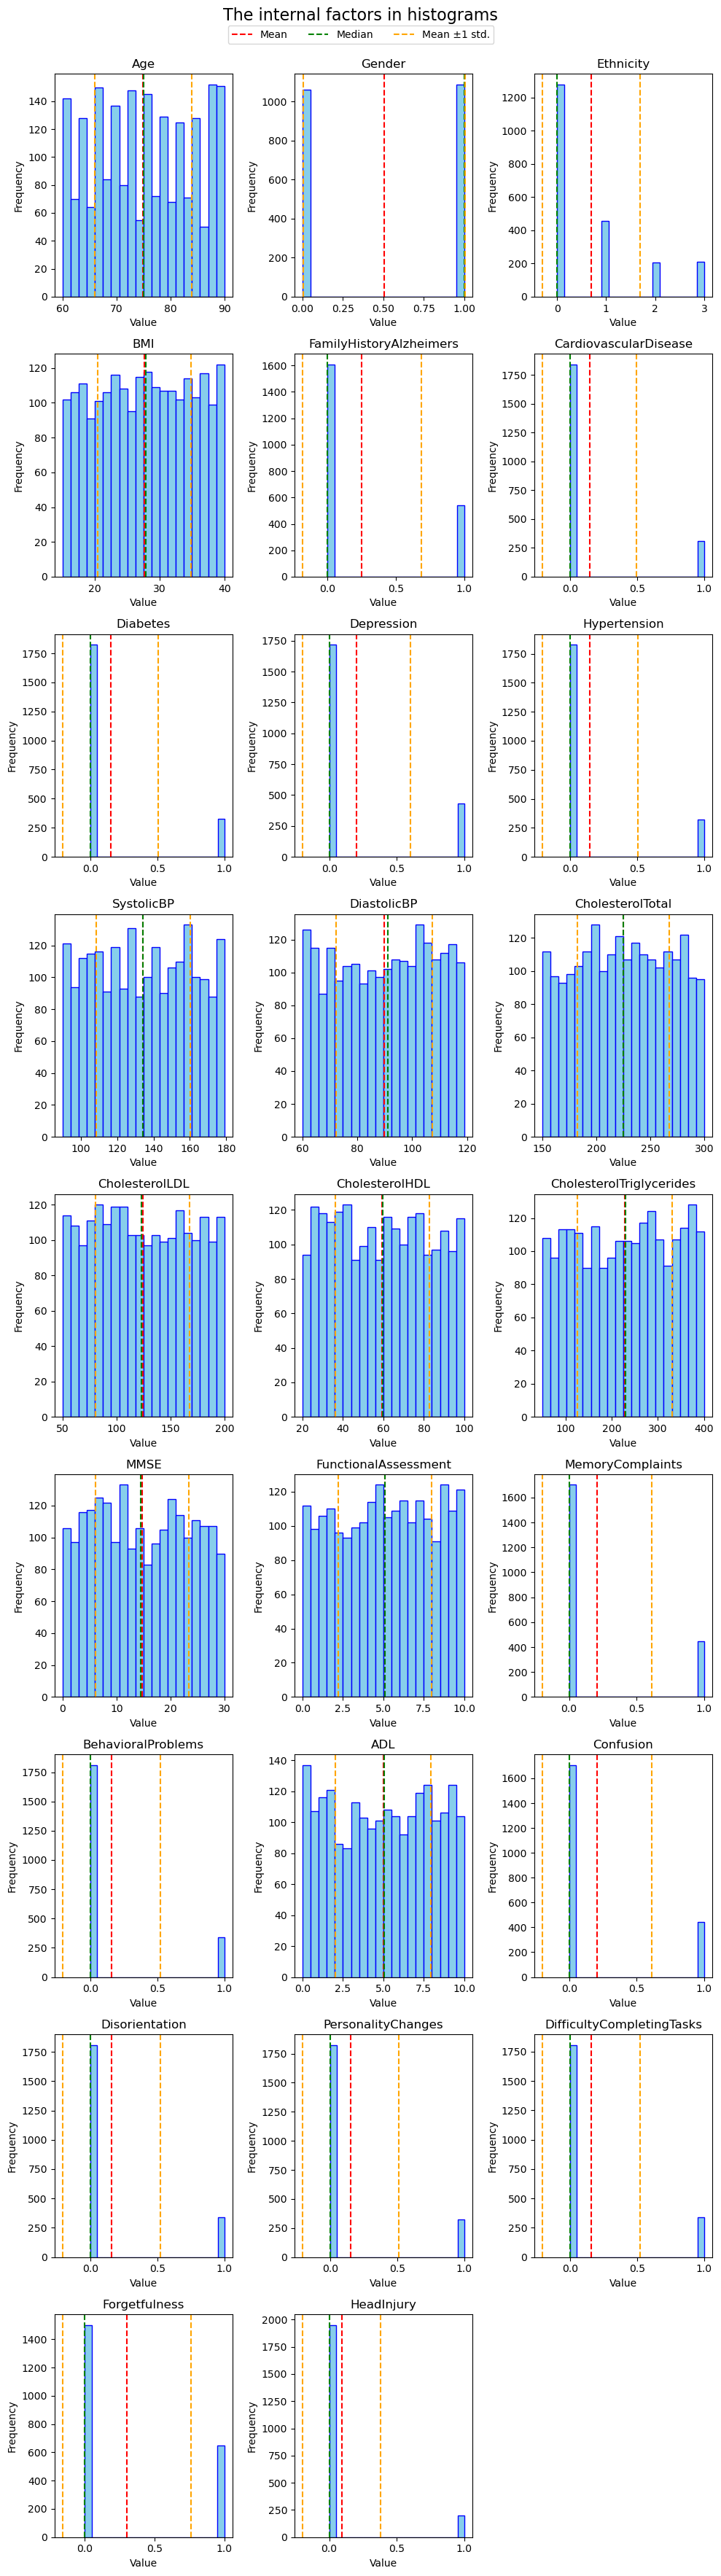

In [31]:
# Plot the internal factors into an image with two columns
num_plots = len(internal_factors)
columns = 3
rows = (num_plots + columns - 1) // columns

fig, axes = plt.subplots(rows, columns, figsize=(10, rows * 4))
fig.suptitle('The internal factors in histograms', fontsize=16)
axes = axes.flatten()

mean_line = Line2D([0], [0], color='red', linestyle='dashed', label='Mean')
median_line = Line2D([0], [0], color='green', linestyle='dashed', label='Median')
std_line = Line2D([0], [0], color='orange', linestyle='dashed', label='Mean ±1 std.')

for i, (key, values) in enumerate(internal_factors.items()):
    axes[i].hist(values, bins=20, color='skyblue', edgecolor='blue')
    mean = np.mean(values)
    std = np.std(values)
    median = np.median(values)

    axes[i].axvline(mean, color='red', linestyle='dashed')
    axes[i].axvline(median, color='green', linestyle='dashed')
    axes[i].axvline(mean + std, color='orange', linestyle='dashed')
    axes[i].axvline(mean - std, color='orange', linestyle='dashed')

    axes[i].set_title(key)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

fig.legend(handles=[mean_line, median_line, std_line], loc='upper center',
           ncol=3, bbox_to_anchor=(0.5, 0.975))

plt.tight_layout(rect=[0, 0, 1, 0.975])
plt.show()

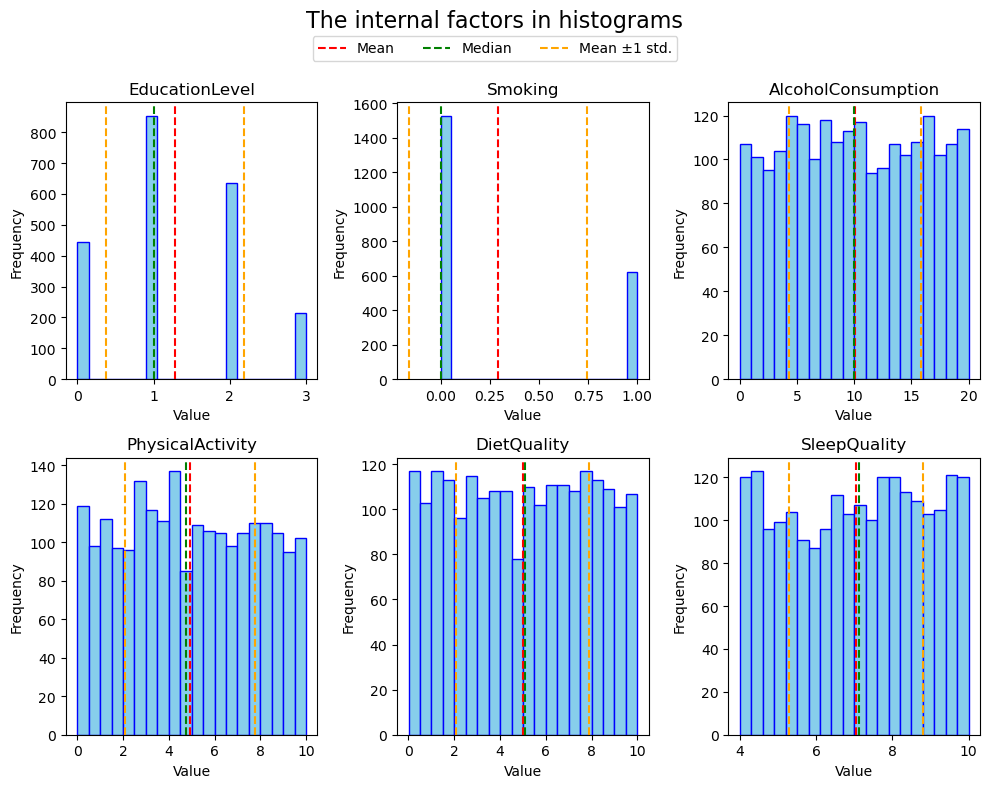

In [32]:
# Plot the internal factors into an image with two columns
num_plots = len(external_factors)
columns = 3
rows = (num_plots + columns - 1) // columns

fig, axes = plt.subplots(rows, columns, figsize=(10, rows * 4))
fig.suptitle('The internal factors in histograms', fontsize=16)
axes = axes.flatten()

mean_line = Line2D([0], [0], color='red', linestyle='dashed', label='Mean')
median_line = Line2D([0], [0], color='green', linestyle='dashed', label='Median')
std_line = Line2D([0], [0], color='orange', linestyle='dashed', label='Mean ±1 std.')

for i, (key, values) in enumerate(external_factors.items()):
    axes[i].hist(values, bins=20, color='skyblue', edgecolor='blue')
    mean = np.mean(values)
    std = np.std(values)
    median = np.median(values)

    axes[i].axvline(mean, color='red', linestyle='dashed')
    axes[i].axvline(median, color='green', linestyle='dashed')
    axes[i].axvline(mean + std, color='orange', linestyle='dashed')
    axes[i].axvline(mean - std, color='orange', linestyle='dashed')

    axes[i].set_title(key)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

fig.legend(handles=[mean_line, median_line, std_line], loc='upper center',
           ncol=3, bbox_to_anchor=(0.5, 0.955))

plt.tight_layout(rect=[0, 0, 1, 0.955])
plt.show()

### Findings
There are a few columns that seem to follow just a few categories:
- Internal factors: `Gender`, `Ethnicity`, `FamilyHistoryAlzheimers`,
`CardiovascularDisease`, `Diabetes`, `Depression`, `Hypertension`,
`MemoryComplaints`, `BehavioralProblems`, `Confusion`, `Disorientation`,
`PersonalityChanges`, `DifficultyCompletingTasks`, `Forgetfulness` and
`HeadInjury`
- External factors: `EducationLevel` and `Smoking`

Out of these, `Ethnicity` and `EducationLevel` have more than two categories,
while the other ones only have two. Something that stands out in the columns
with only two categories, is that usually the 'No' bar (corresponding to
value 0) is much larger than the 'Yes' bar (corresponding to value 1). The only
categorical data where this is not the case is the `Gender` column, which shows
that the two genders are represented roughly equally. A next step for cleaning
the columns mentioned above is to attach a more meaningful label to the numbers.

For all colums that do not follow a few categories we see that the median and
mean are roughly at the same value. Besides that, none of the columns seem to
follow some sort of distribution. However, it also does not seem like each
symptom is uniformly distributed among the population.

In [33]:
# Attach the correct labels to categorical data columns
yesno_cols = ['FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes',
              'Depression', 'Hypertension', 'MemoryComplaints', 'BehavioralProblems',
              'Confusion', 'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
              'Forgetfulness', 'HeadInjury', 'Smoking']
labeled_data = {}
for key in yesno_cols:
    labeled_data[key] = np.where(
        np.array(data[key]) == 0, 'no', 'yes').tolist()
labeled_data['Gender'] = np.where(
    np.array(data['Gender']) == 0, 'male', 'female').tolist()
mapping = {0: "Caucasian", 1: "African American", 2: "Asian", 3: "Other"}
labeled_data['Ethnicity'] = np.vectorize(
    mapping.get)(data['Ethnicity']).tolist()
mapping = {0: "none", 1: "high school", 2: "bachelor", 3: "higher"}
labeled_data['EducationLevel'] = np.vectorize(
    mapping.get)(data['EducationLevel']).tolist()

for key in labeled_data.keys():
    print(f'{key}: {labeled_data[key][:5] + ['...']}')

FamilyHistoryAlzheimers: ['no', 'no', 'yes', 'no', 'no', '...']
CardiovascularDisease: ['no', 'no', 'no', 'no', 'no', '...']
Diabetes: ['yes', 'no', 'no', 'no', 'no', '...']
Depression: ['yes', 'no', 'no', 'no', 'no', '...']
Hypertension: ['no', 'no', 'no', 'no', 'no', '...']
MemoryComplaints: ['no', 'no', 'no', 'no', 'no', '...']
BehavioralProblems: ['no', 'no', 'no', 'yes', 'no', '...']
Confusion: ['no', 'no', 'no', 'no', 'no', '...']
Disorientation: ['no', 'no', 'yes', 'no', 'no', '...']
PersonalityChanges: ['no', 'no', 'no', 'no', 'yes', '...']
DifficultyCompletingTasks: ['yes', 'no', 'yes', 'no', 'yes', '...']
Forgetfulness: ['no', 'yes', 'no', 'no', 'no', '...']
HeadInjury: ['no', 'no', 'no', 'no', 'no', '...']
Smoking: ['no', 'no', 'no', 'yes', 'no', '...']
Gender: ['male', 'male', 'male', 'female', 'male', '...']
Ethnicity: ['Caucasian', 'Caucasian', 'Other', 'Caucasian', 'Caucasian', '...']
EducationLevel: ['bachelor', 'none', 'high school', 'high school', 'none', '...']


### Finding outliers
Using boxplots it is possible to find out if any of the columns have outliers, which would need to be removed.

In [34]:
def detect_outliers(data):
    """
    Detect outliers in numerical columns using the Interquartile Range (IQR) method.
    """
    outliers = {}
    
    # Identify numerical columns
    numerical_columns = [
        col for col in data.keys() 
        if all(isinstance(x, (int, float)) for x in data[col])
    ]
    
    for column in numerical_columns:
        # Calculate Q1, Q3, and IQR
        values = data[column]
        Q1 = np.percentile(values, 25)
        Q3 = np.percentile(values, 75)
        IQR = Q3 - Q1
        
        # Define outlier boundaries
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Find outliers
        column_outliers = [
            (i, val) for i, val in enumerate(values) 
            if val < lower_bound or val > upper_bound
        ]
        
        outliers[column] = {
            'outliers': column_outliers,
            'lower_bound': lower_bound,
            'upper_bound': upper_bound,
            'total_outliers': len(column_outliers),
            'outlier_percentage': (len(column_outliers) / len(values)) * 100
        }
    
    return outliers

def visualize_outliers(data, outliers):
    """
    Create box plots to visualize outliers in numerical columns.
    """

    numerical_columns = [
        col for col in data.keys() 
        if all(isinstance(x, (int, float)) for x in data[col])
    ]
    
    plt.figure(figsize=(15, 6))
    plt.title('Outliers in Numerical Columns', fontsize=16)
    sns.boxplot(data=[data[col] for col in numerical_columns])
    plt.xticks(range(len(numerical_columns)), numerical_columns, rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

def print_outlier_summary(outliers):
    """
    Print a summary of outliers for each numerical column.
    """
    print("\nOutlier Detection Summary:")
    for column, info in outliers.items():
        print(f"\n{column}:")
        print(f"  Total Outliers: {info['total_outliers']}")
        print(f"  Percentage of Outliers: {info['outlier_percentage']:.2f}%")
        print(f"  Lower Bound: {info['lower_bound']}")
        print(f"  Upper Bound: {info['upper_bound']}")
        
        # Print first 5 outliers if any exist
        if info['outliers']:
            print("  Sample Outliers (index, value):")
            for idx, (i, val) in enumerate(info['outliers'][:5]):
                print(f"    {i}: {val}")
            if len(info['outliers']) > 5:
                print(f"    ... and {len(info['outliers']) - 5} more")


Outlier Detection Summary:

Age:
  Total Outliers: 0
  Percentage of Outliers: 0.00%
  Lower Bound: 43.0
  Upper Bound: 107.0

Gender:
  Total Outliers: 0
  Percentage of Outliers: 0.00%
  Lower Bound: -1.5
  Upper Bound: 2.5

Ethnicity:
  Total Outliers: 211
  Percentage of Outliers: 9.82%
  Lower Bound: -1.5
  Upper Bound: 2.5
  Sample Outliers (index, value):
    2: 3
    6: 3
    10: 3
    31: 3
    47: 3
    ... and 206 more

EducationLevel:
  Total Outliers: 0
  Percentage of Outliers: 0.00%
  Lower Bound: -0.5
  Upper Bound: 3.5

BMI:
  Total Outliers: 0
  Percentage of Outliers: 0.00%
  Lower Bound: 3.223853202798761
  Upper Bound: 52.257332438089264

Smoking:
  Total Outliers: 0
  Percentage of Outliers: 0.00%
  Lower Bound: -1.5
  Upper Bound: 2.5

AlcoholConsumption:
  Total Outliers: 0
  Percentage of Outliers: 0.00%
  Lower Bound: -9.887371948487203
  Upper Bound: 30.185112150858345

PhysicalActivity:
  Total Outliers: 0
  Percentage of Outliers: 0.00%
  Lower Bound: -4.7

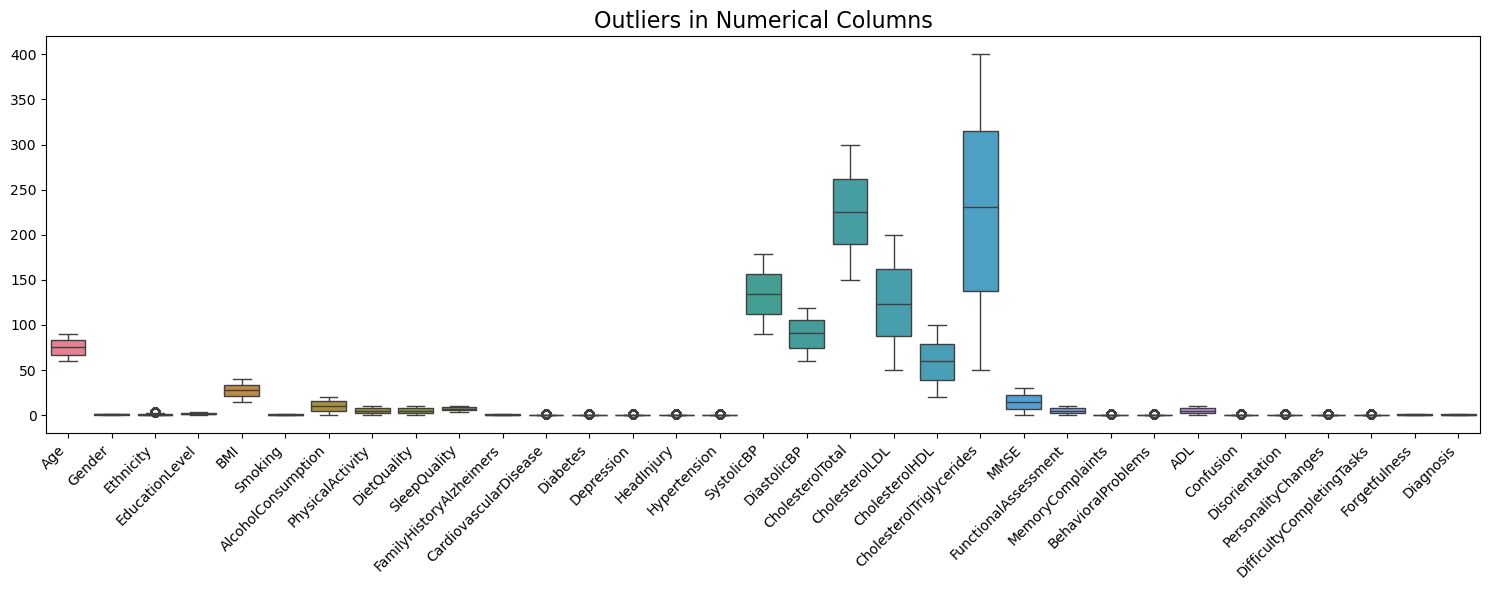

In [35]:
outliers = detect_outliers({key: value for key, value in data.items() if key != 'PatientID'})
print_outlier_summary(outliers)
visualize_outliers({key: value for key, value in data.items() if key != 'PatientID'}, outliers)

### Comparisons

Some variables might show a significant difference between people with and without Alzheimer's disease. Based on whether or not a patient got a diagnosis, the data is split into two halves. Those two halves are compared in the plots below.

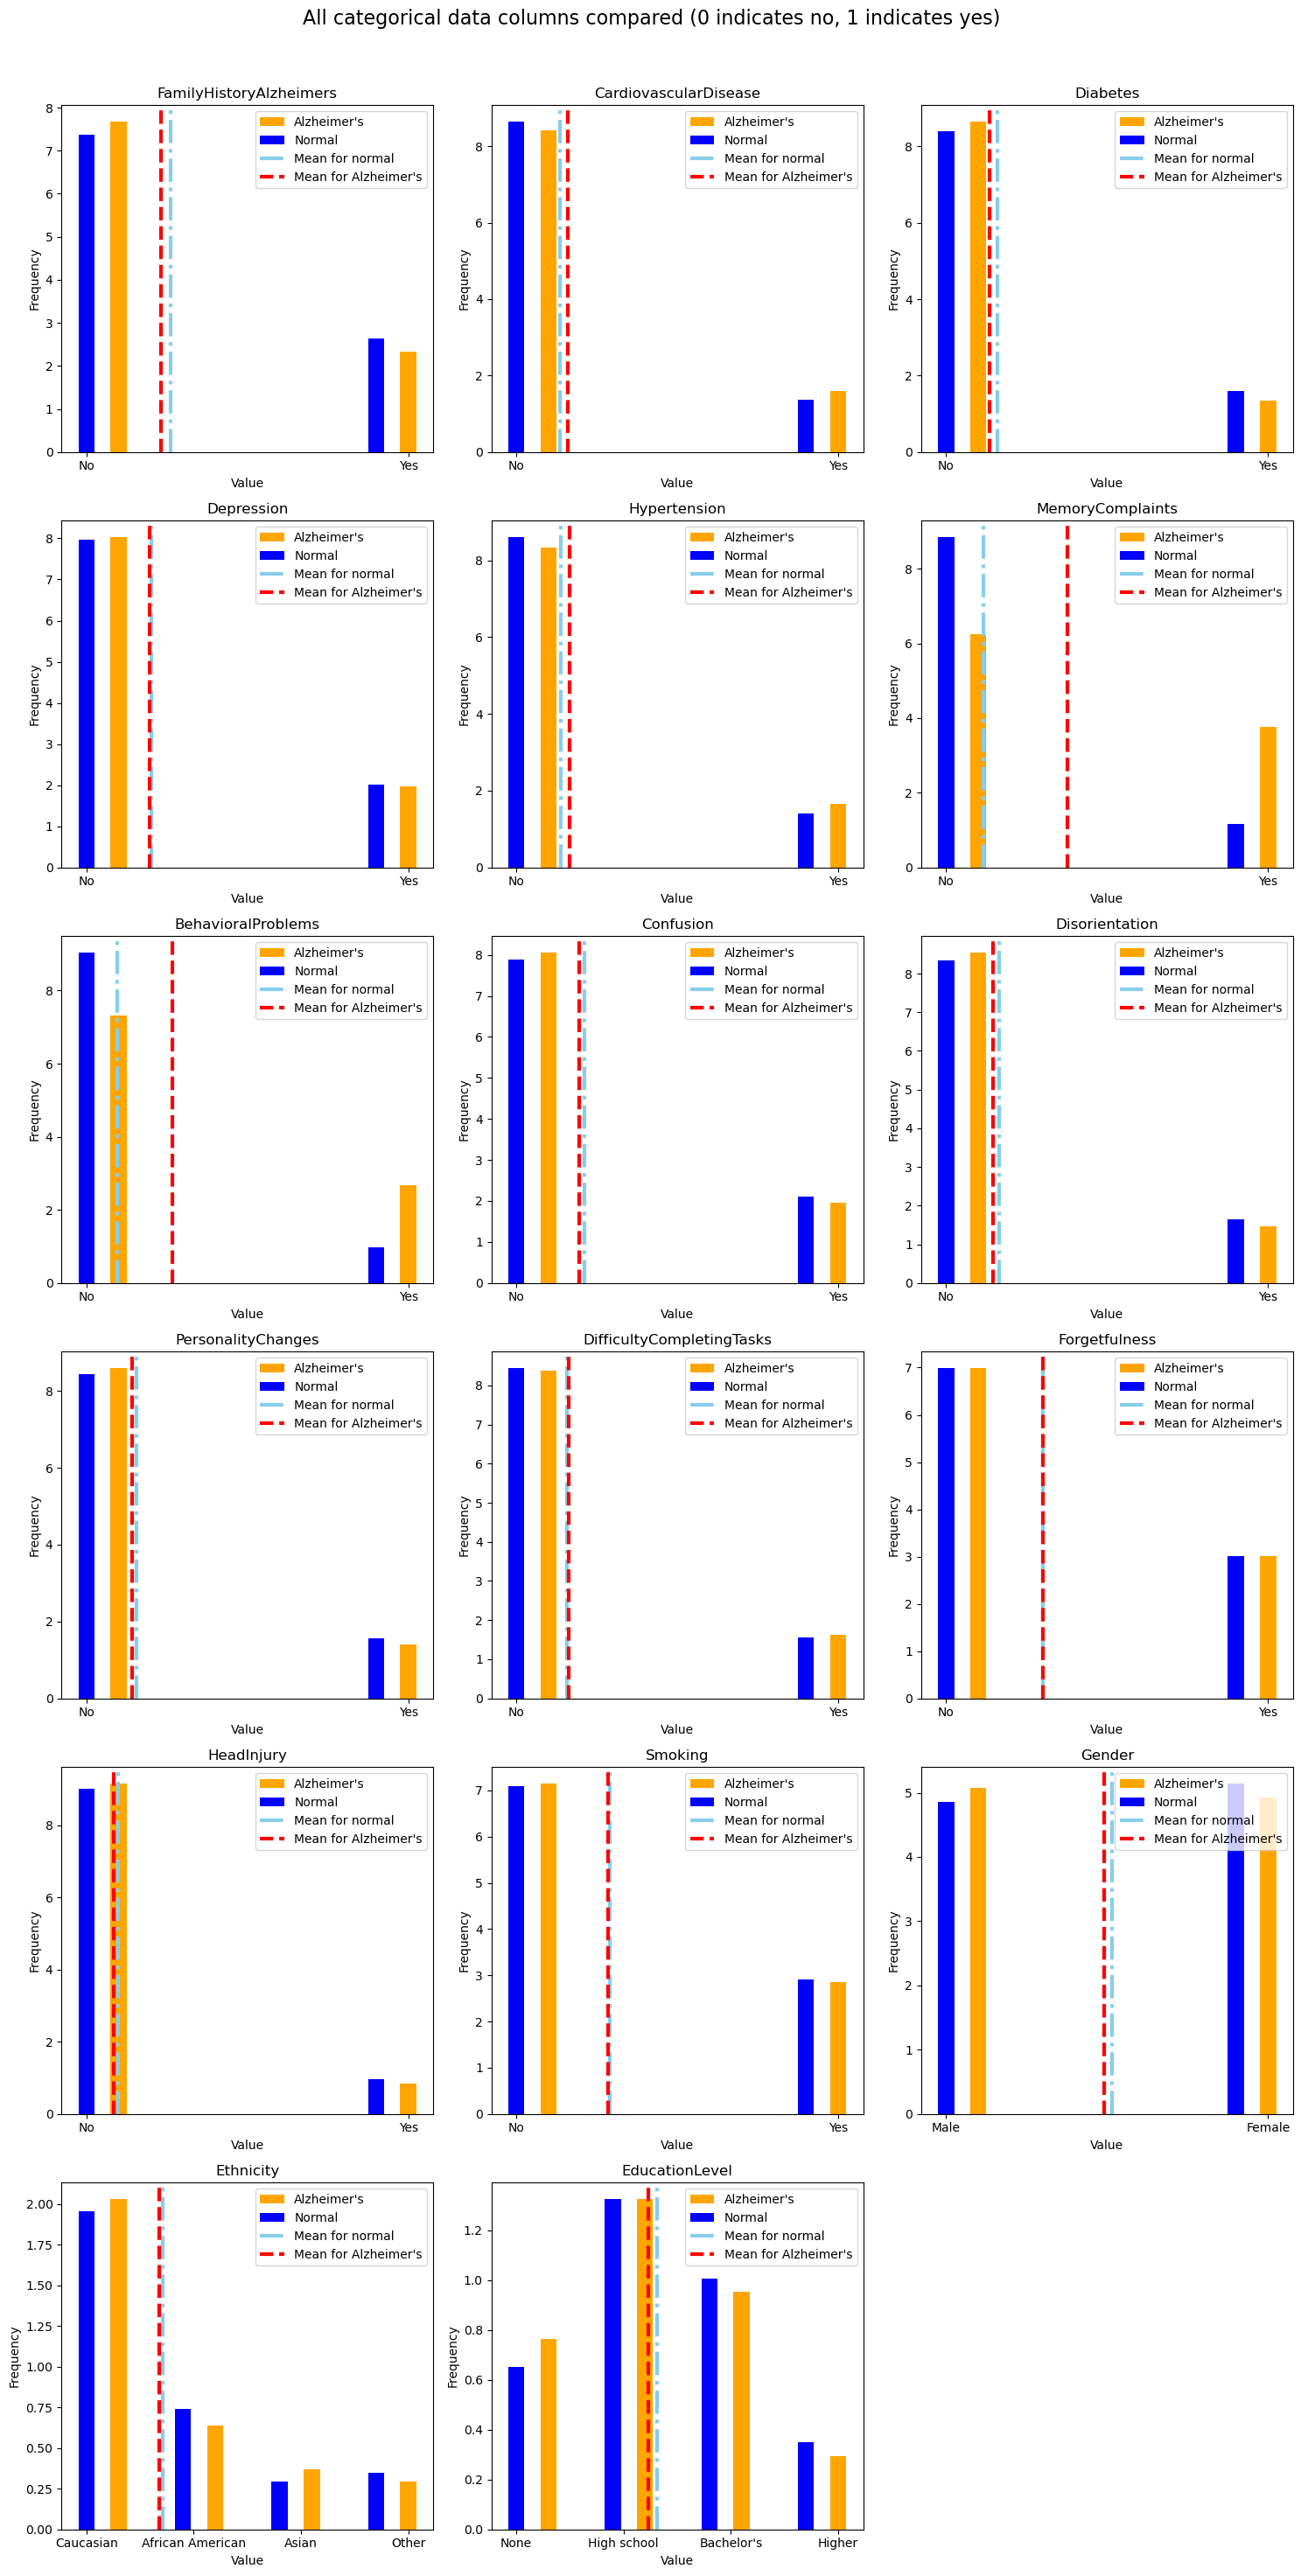

In [36]:
labels = list(labeled_data.keys())
num_labels = len(labels)

max_cols = 3
num_rows = -(-num_labels // max_cols)

fig, axes = plt.subplots(num_rows, max_cols, figsize=(15, num_rows * 5))

axes = axes.flatten()

for idx, label in enumerate(labels):
    alz_indexes = np.where(np.array(data['Diagnosis']) == 1)[0].tolist()
    alz_data = []
    normal_data = []
    for i in range(len(data[label])):
        if i in alz_indexes:
            alz_data.append(data[label][i])
        else:
            normal_data.append(data[label][i])

    ax = axes[idx]
    ax.hist(alz_data, color='orange', align='right', rwidth=0.5, density=True, label='Alzheimer\'s')
    ax.hist(normal_data, color='blue', align='left', rwidth=0.5, density=True, label='Normal')
    ax.axvline(x=np.mean(normal_data), label='Mean for normal', color='skyblue', lw=3, ls='-.')
    ax.axvline(x=np.mean(alz_data), label='Mean for Alzheimer\'s', color='red', lw=3, ls='--')
    ax.set_title(label)
    ax.legend()
    if label == 'Gender':
        ax.set_xticks([0, 1], ['Male', 'Female'])
    elif label == 'EducationLevel':
        ax.set_xticks([0, 1, 2, 3], ['None', 'High school', 'Bachelor\'s', 'Higher'])
    elif label == 'Ethnicity':
        ax.set_xticks([0, 1, 2, 3], ['Caucasian', 'African American', 'Asian', 'Other'])
    else:
        ax.set_xticks([0, 1], ['No', 'Yes'])
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

for idx in range(len(labels), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout(rect=[0, 0, 1, 0.955])
plt.suptitle('All categorical data columns compared (0 indicates no, 1 indicates yes)', fontsize=16)
plt.show()

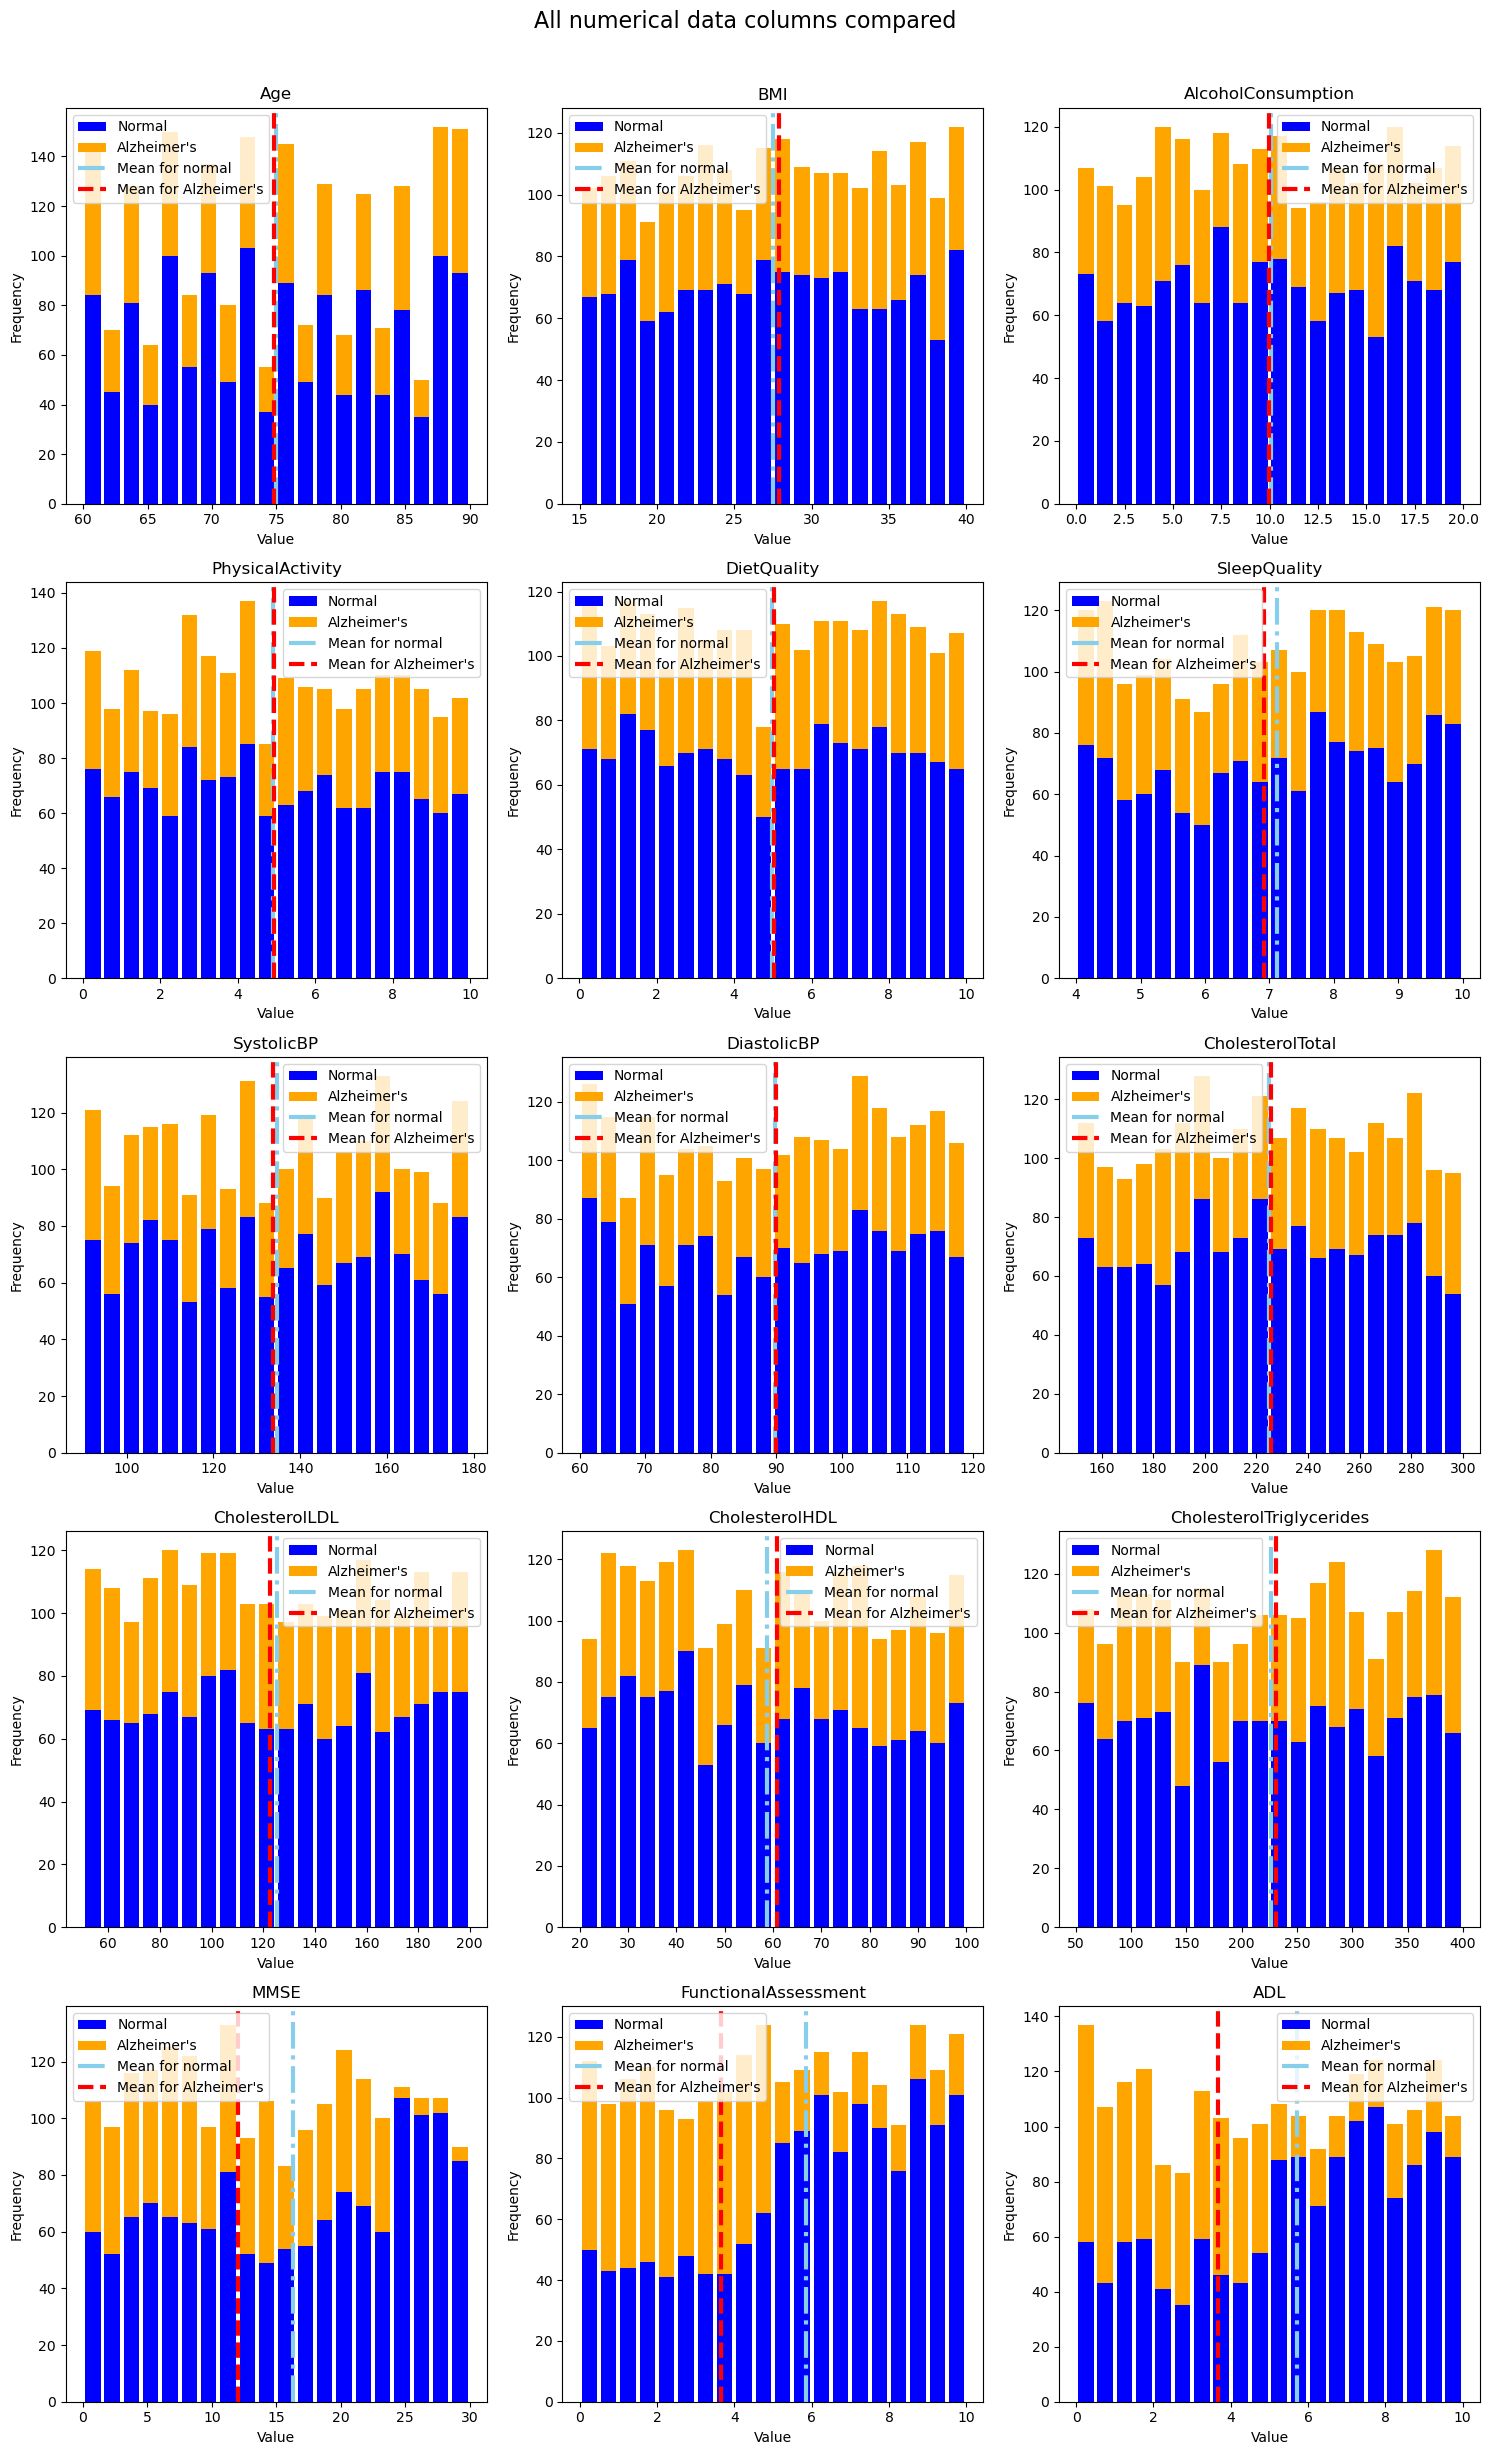

In [37]:
excluded_labels = list(labeled_data.keys()) + ['Diagnosis', 'PatientID', 'DoctorInCharge']
labels = []
for label in data.keys():
    if not label in excluded_labels:
        labels.append(label)
num_labels = len(labels)

max_cols = 3
num_rows = -(-num_labels // max_cols)

fig, axes = plt.subplots(num_rows, max_cols, figsize=(15, num_rows * 5))

axes = axes.flatten()

for idx, label in enumerate(labels):
    alz_indexes = np.where(np.array(data['Diagnosis']) == 1)[0].tolist()
    alz_data = []
    normal_data = []
    for i in range(len(data[label])):
        if i in alz_indexes:
            alz_data.append(data[label][i])
        else:
            normal_data.append(data[label][i])

    data_comb = [normal_data, alz_data]
    axes[idx].hist(data_comb, bins=20, color=['blue', 'orange'], rwidth=0.8, label=["Normal", "Alzheimer's"], stacked=True)
    axes[idx].axvline(x=np.mean(normal_data), label='Mean for normal', color='skyblue', lw=3, ls='-.')
    axes[idx].axvline(x=np.mean(alz_data), label='Mean for Alzheimer\'s', color='red', lw=3, ls='--')
    axes[idx].set_title(label)
    axes[idx].legend()
    axes[idx].set_xlabel('Value')
    axes[idx].set_ylabel('Frequency')

for idx in range(len(labels), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout(rect=[0, 0, 1, 0.955])
plt.suptitle('All numerical data columns compared', fontsize=16)
plt.show()

From these comparisons, we can conclude that there are a few parameters that show different behavior based on the diagnosis.
- Categorical:
    - `MemoryComplaints` are more common among people with Alzheimer's
    - `BehavioralProblems` are more common among people with Alzheimer's
    - `EducationLevel` seems to be a little bit lower on average for people with Alzheimer's
- Numerical:
    - `MMSE` tends to be lower on average for people with Alzheimer's
    - `FunctionalAssessment` tends to be lower for people with Alzheimer's
    - `ADL` tends to be lower for people with Alzheimer's

### Correlations

We checked for correlations between numerical variables, using a heatmap.  

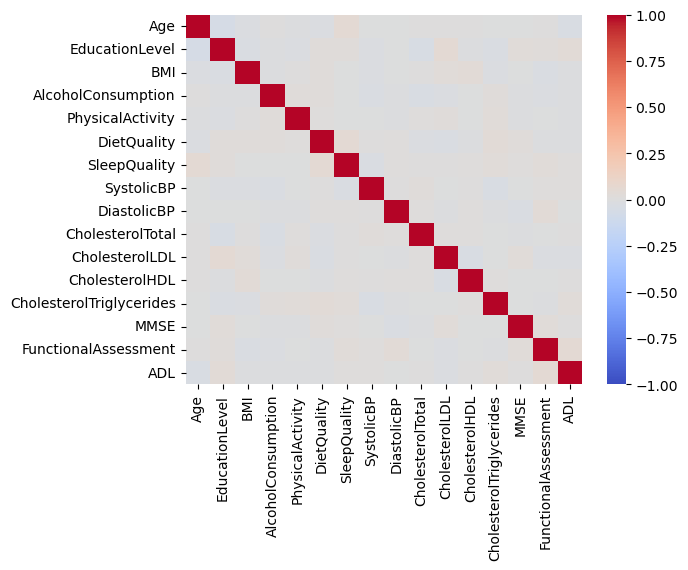

In [38]:
# correlations between numerical columns

df = pd.DataFrame({key: value for key, value in data.items() if key != 'DoctorInCharge'})

numerical_variables = ['Age', 'EducationLevel', 'BMI','AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'SystolicBP',
       'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment', 'ADL']

correlation_matrix = df[numerical_variables].corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

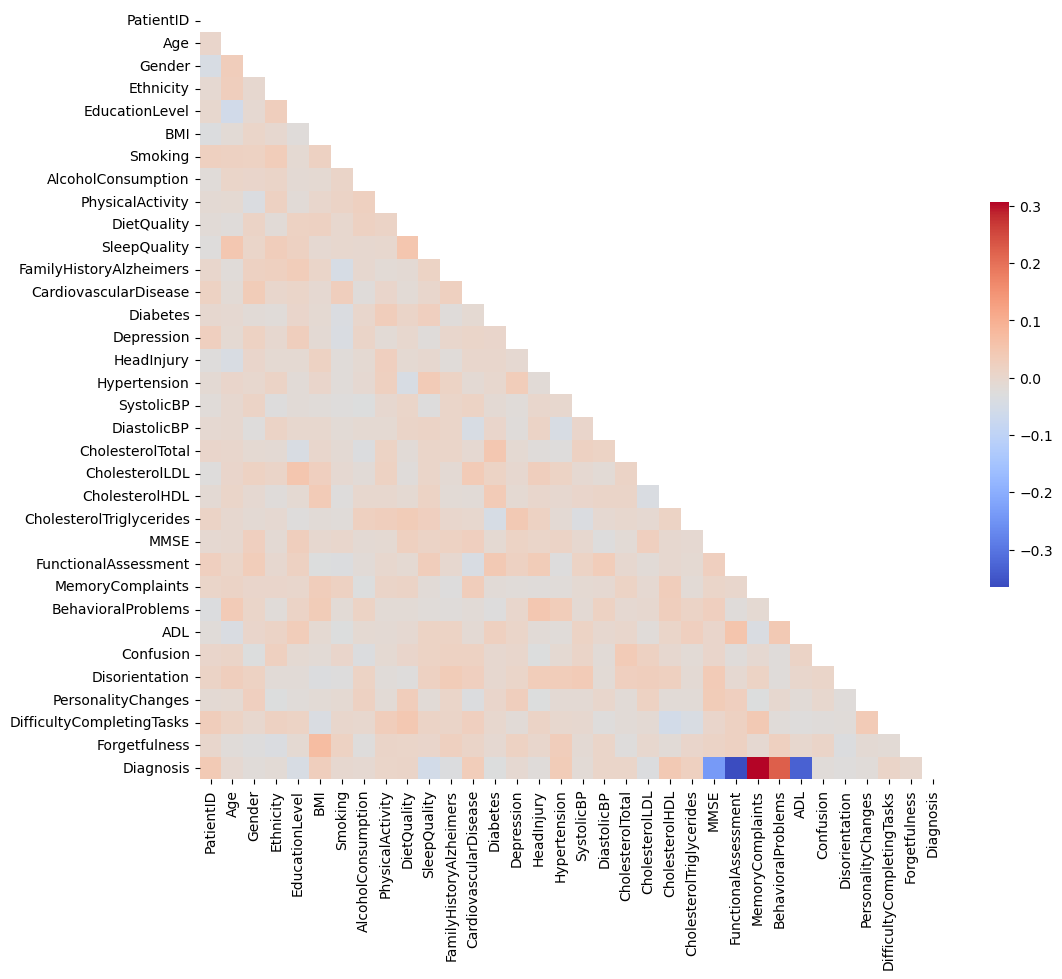

In [39]:
# alternate plot of the heatmap 
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(),cmap="coolwarm", cbar_kws={"shrink": .5}, mask=mask)
plt.show()

We checked if there is a quadratic fit in the data. For example, very low or very high bloop pressure has negative health outcomes - perhaps there are similimar curvilinear relationships with the cholestrol variables.

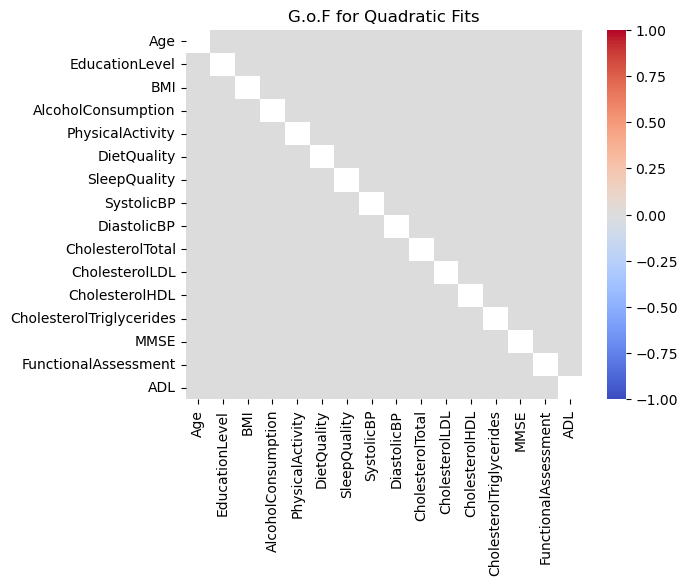

In [40]:
r2_matrix = pd.DataFrame(index=numerical_variables, columns=numerical_variables)

# Polynomial feature transformation - quadratic
poly = PolynomialFeatures(degree=2)

# fit quadratic models and calculate R^2
for col1 in numerical_variables:
    for col2 in numerical_variables:
        if col1 != col2:
            X = df[[col1]]
            y = df[col2]
            X_poly = poly.fit_transform(X)
            model = LinearRegression().fit(X_poly, y)
            y_pred = model.predict(X_poly)
            r2 = r2_score(y, y_pred)
            r2_matrix.loc[col1, col2] = r2

r2_matrix = r2_matrix.apply(pd.to_numeric)
sns.heatmap(r2_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('G.o.F for Quadratic Fits')
plt.show()

No quadratic relationships between any two variables were found. 

Diagnosis rates for different variables, grouped by ethnicity (?) 

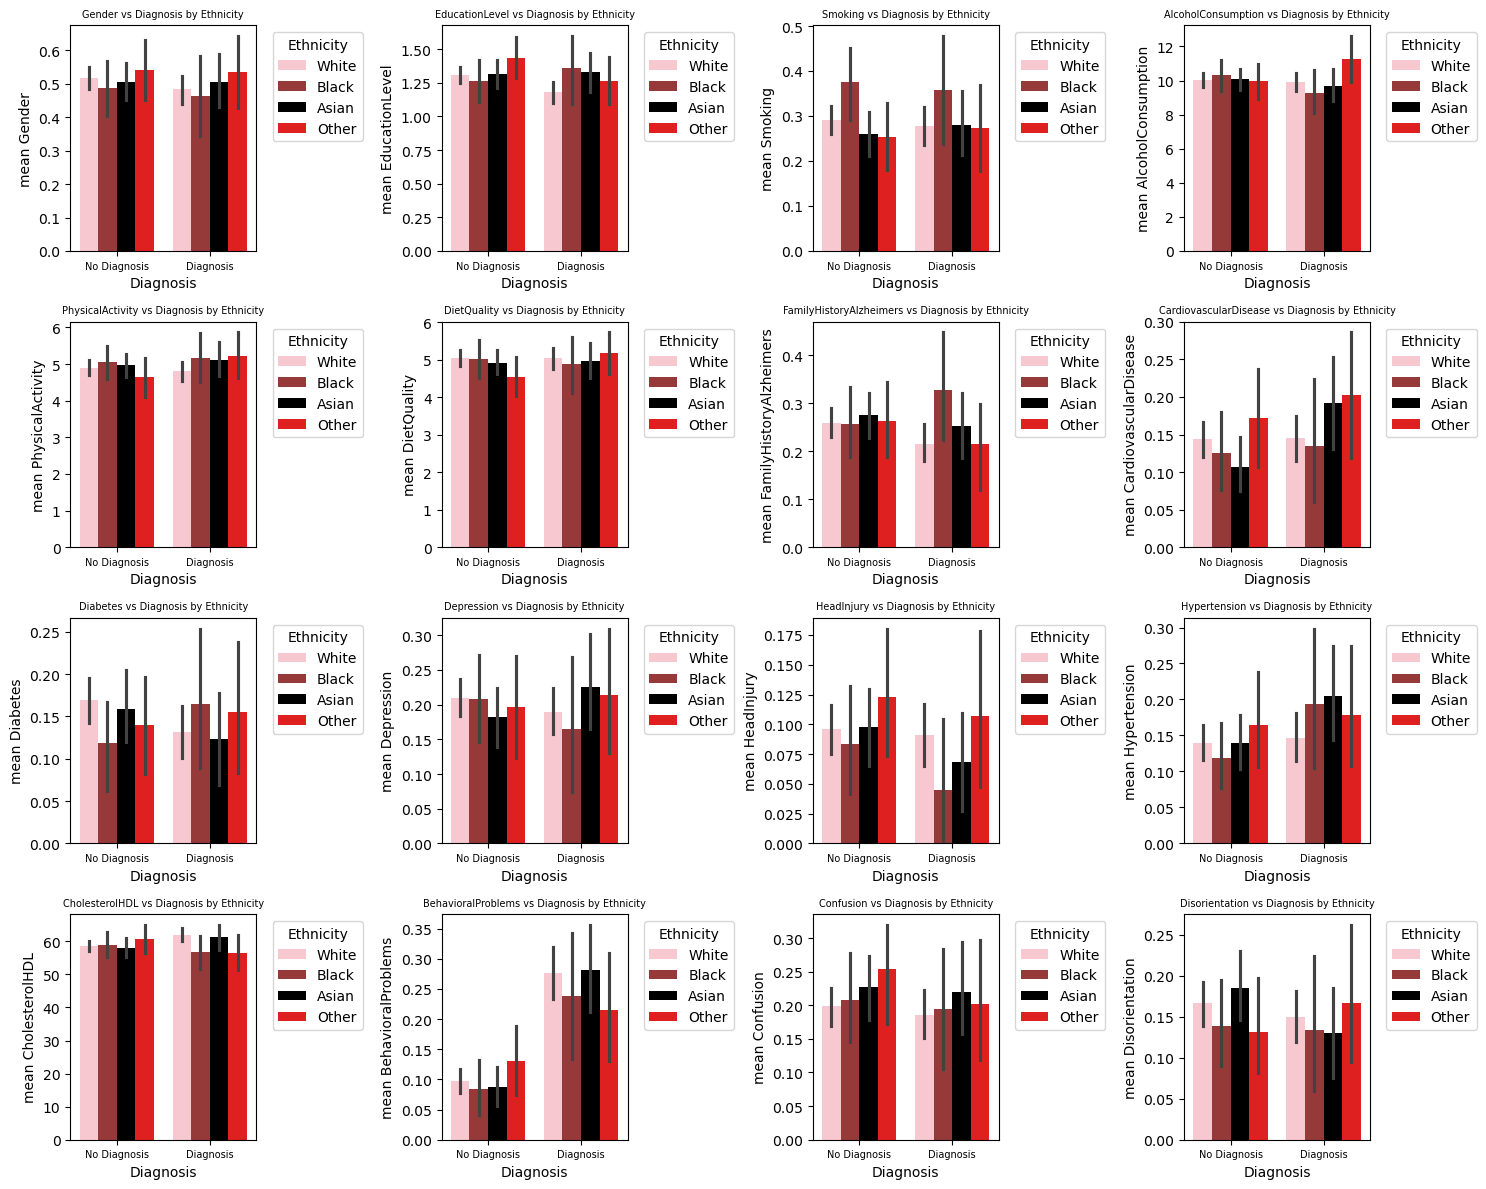

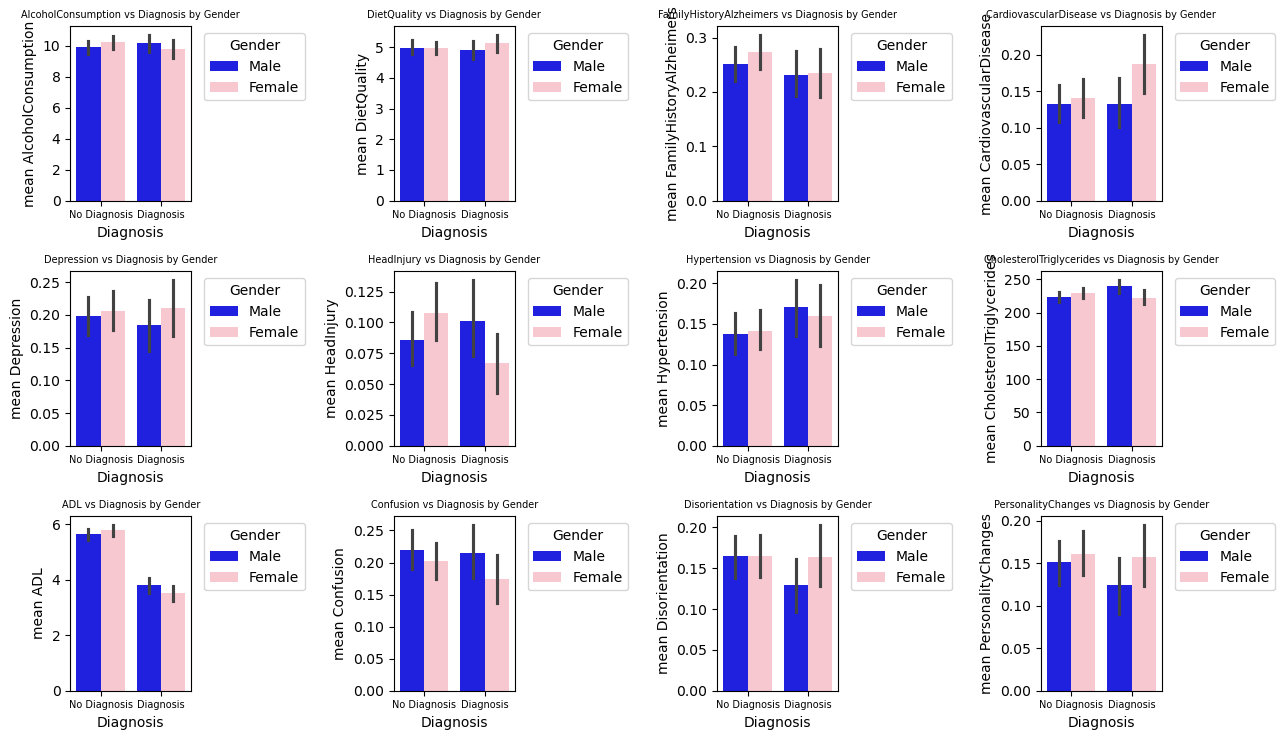

In [41]:
df = pd.DataFrame(data)

# LIST OF SIGNIFICANT-LOOKING IVs THAT INTERACT WITH ETHNICITY 
vars_ethnicity = ['Gender', 'EducationLevel', 'Smoking', 'AlcoholConsumption', 'PhysicalActivity',
                  'DietQuality', 'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes',
                  'Depression', 'HeadInjury', 'Hypertension', 'CholesterolHDL',
                  'BehavioralProblems', 'Confusion', 'Disorientation']

# LIST OF SIGNIFICANT-LOOKING IVs THAT INTERACT WITH GENDER 
vars_gender = ['AlcoholConsumption', 'DietQuality', 'FamilyHistoryAlzheimers', 'CardiovascularDisease',
               'Depression', 'HeadInjury', 'Hypertension', 'CholesterolTriglycerides','ADL',
               'Confusion', 'Disorientation', 'PersonalityChanges']

# plotting (EDA)
df['Ethnicity'] = df['Ethnicity'].map({0: 'white', 1: 'black', 2: 'asian', 3: 'other'})
gender_palette = {0: 'blue', 1: 'pink'}
ethnicity_palette = {'white': 'pink', 'black': 'black','asian': 'red','other': 'brown'}

def adjust_plot(ax, var, category, labels, palette):
    ax.set_title(f'{var} vs Diagnosis by {category}', fontsize=7)
    ax.set_ylabel(f'mean {var}')
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['No Diagnosis', 'Diagnosis'], size=7)
    handles, _ = ax.get_legend_handles_labels()
    ax.legend(handles, labels, title=category, bbox_to_anchor=(1.05, 1), loc='upper left', facecolor='white')
    ax.set_facecolor('white')
    
# ethnicity plots
n_cols = 4
n_rows = len(vars_ethnicity) // n_cols + (1 if len(vars_ethnicity) % n_cols != 0 else 0)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 3 * n_rows))
axes = axes.flatten()

for i, var in enumerate(vars_ethnicity):
    sns.barplot(x='Diagnosis', y=var, hue='Ethnicity', data=df, ax=axes[i], palette=ethnicity_palette)
    adjust_plot(axes[i], var, 'Ethnicity', ['White', 'Black', 'Asian', 'Other'], ethnicity_palette)

plt.tight_layout()
plt.show()

# gender plots
n_rows = len(vars_gender) // n_cols + (1 if len(vars_gender) % n_cols != 0 else 0)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(13, 2.5 * n_rows))
axes = axes.flatten()

for i, var in enumerate(vars_gender):
    sns.barplot(x='Diagnosis', y=var, hue='Gender', data=df, ax=axes[i], palette=gender_palette)
    adjust_plot(axes[i], var, 'Gender', ['Male', 'Female'], gender_palette)

plt.tight_layout()
plt.show()